# Generate lensing efficiency function in terms of redshift for cases with different number of tomographic bins. The output would be used for Cijl and Gm calculation. --09/12/2018

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys, os

In [3]:
sys.path.append("/Users/ding/Documents/playground/shear_ps/SVD_ps/")
import cosmic_params
sys.path.append("/Users/ding/Documents/playground/shear_ps/SVD_ps/KW_modules/")
sys.path.append("/Users/ding/Documents/playground/shear_ps/SVD_ps/common_modules/")

In [4]:
from lens_eff_module import lens_eff
from module_market import dis_fun, comove_d

In [5]:
nrbin = 25              # number of tomographic bins, change it case by case 

In [6]:
# get redshift range from n(z) file
idir0 = '/Users/ding/Documents/playground/shear_ps/SVD_ps/'
inputf = idir0 + 'Input_files/nz_stage_IV.txt'             # Input file of n(z) which is the galaxy number density distribution in terms of z
# Here center_z denotes z axis of n(z). It may not be appropriate since we don't have redshift bin setting
center_z, n_z = np.loadtxt(inputf, dtype='f8', comments='#', unpack=True)

In [7]:
center_z

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
       2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25,
       3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05])

In [8]:
z_array = np.linspace(0.0, 2.0, 2000)

In [9]:
help(comove_d)

Help on function comove_d in module module_market:

comove_d(z)
    # without c/H_0 constant



In [10]:
c = 2.99792458e5                        # speed of light unit in km/s
H_0 = 100                               # reduced Hubble constant, unit in h km/s/Mpc

In [11]:
chi_array = np.array([], dtype=np.float64)
for z in z_array:
    chi_z = comove_d(z)                 # without c/H_0 constant in chi_z
    chi_array = np.append(chi_array, chi_z)   

In [12]:
z_min = center_z[0]
z_max = 2.0             # based on the data file, at z=2.0, n(z) is very small
zbin_avg = (z_max-z_min)/float(nrbin)
zbin = np.zeros(nrbin + 1)
for i in range(nrbin):
    zbin[i]=i*zbin_avg + z_min
zbin[-1]= z_max

In [13]:
chibin = np.zeros(nrbin+1)
for i in range(0, nrbin+1):
    chibin[i] = comove_d(zbin[i])

In [14]:
g_i_matrix = np.array([], dtype=np.float64).reshape(0, len(chi_array))  # each row stores g_i for a given tomographic bins id
for i in range(nrbin):
    j = 0
    g_i = np.zeros(len(chi_array))
    for chi in chi_array:
        if chi < chibin[i+1]:
            g_i[j] = lens_eff(i, chi, chibin)
        j += 1
    g_i_matrix = np.vstack((g_i_matrix, g_i))

In [15]:
g_i

array([1.00000000e+00, 9.99158369e-01, 9.98317127e-01, ...,
       7.00055583e-06, 1.74916873e-06, 0.00000000e+00])

In [16]:
chi_array

array([0.00000000e+00, 1.00026935e-03, 2.00007670e-03, ...,
       1.20111306e+00, 1.20144689e+00, 1.20178056e+00])

Text(0,0.5,'$g^i(z)$')

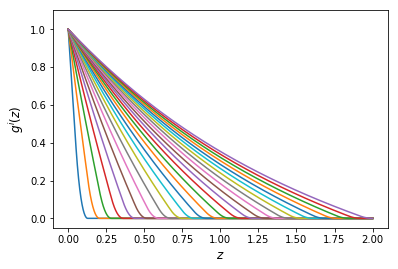

In [17]:
for i in range(nrbin):
    plt.plot(z_array, g_i_matrix[i, :])
plt.ylim(-0.05, 1.1)
plt.xlabel(r'$z$', fontsize=12)
plt.ylabel(r'$g^i(z)$', fontsize=12)

Text(0,0.5,'$\\chi(z)g^i(z)$')

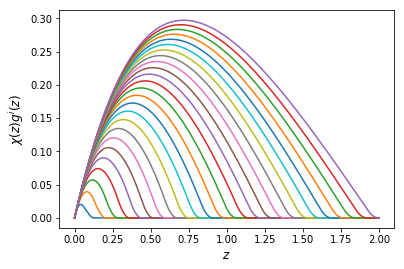

In [18]:
for i in range(nrbin):
    plt.plot(z_array, chi_array*g_i_matrix[i, :])
plt.xlabel(r'$z$', fontsize=12)
plt.ylabel(r'$\chi(z)g^i(z)$', fontsize=12)

In [19]:
odir = './lens_eff_g_i/'
survey_stage = 'KW_stage_IV'
if not os.path.exists(odir):
    os.makedirs(odir)
filename = 'g_i_{}rbins.npz'.format(nrbin)
ofile = odir + filename
np.savez_compressed(ofile, z_array=z_array, chi_array = chi_array, g_i_matrix=g_i_matrix)